In [1]:
from physics.hstar import gghzz, c6
from physics.hzz import angles, zpair
from physics.simulation import msq

import numpy as np
import matplotlib.pyplot as plt

In [2]:
SAMPLE_DIR = '..'

In [4]:
sample_sig = gghzz.Process(msq.Component.SIG, (0.1, os.path.join(SAMPLE_DIR, 'ggZZ2e2m_sig.csv'), 500000))

In [17]:
c6_values = [-10,10]
c6_mod = c6.Modifier(baseline = msq.Component.SIG, c6_values = [-5,-1,0,1,5])
c6_weights, c6_prob = c6_mod.modify(sample=sample_sig, c6=c6_values)

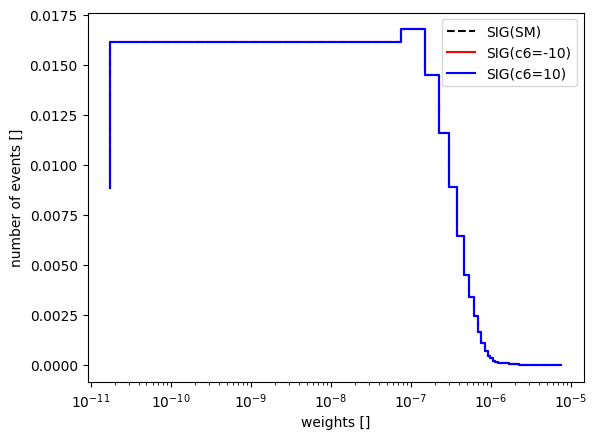

In [ ]:
BINS = 100

hist_sm_wt, bins = np.histogram(sample_sig.events.weights, bins=BINS, range=(np.min(sample_sig.events.weights), np.max(sample_sig.events.weights)), weights=sample_sig.events.weights)
hist_c1_wt_pos10, bins = np.histogram(c6_weights.T[1], bins=BINS, range=(np.min(c6_weights.T[1]), np.max(c6_weights.T[1])), weights=c6_weights.T[1])
hist_c1_wt_neg10, bins = np.histogram(c6_weights.T[0], bins=BINS, range=(np.min(c6_weights.T[0]), np.max(c6_weights.T[0])), weights=c6_weights.T[0])

plt.step(bins[:-1], hist_sm_wt, color='k', linestyle='--', label='SIG(SM)')
plt.step(bins[:-1], hist_c1_wt_pos10, color='r', label='SIG(c6=-10)')
plt.step(bins[:-1], hist_c1_wt_neg10, color='b', label='SIG(c6=10)')

plt.xlabel('weights []')
#plt.yscale('log')
plt.ylabel('number of events []')

plt.legend()

plt.show()